## Preprocessing

In [36]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras import regularizers

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [37]:
# Drop the non-beneficial ID column, 'EIN' 
application_df.drop(['EIN'], axis=1, inplace=True)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [38]:
# Drop additional columns for optimization
application_df = application_df.drop(columns = ['SPECIAL_CONSIDERATIONS', 'STATUS'])
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [39]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                19568
APPLICATION_TYPE       17
AFFILIATION             6
CLASSIFICATION         71
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
ASK_AMT              8747
IS_SUCCESSFUL           2
dtype: int64

In [40]:
# Look at NAME value counts to identify and replace with "Other"
name_count = application_df['NAME'].value_counts()
name_count

NAME
PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: count, Length: 19568, dtype: int64

In [41]:
# Choose a cutoff value and create a list of application types to be replaced use the variable name `names_to_replace`
names_to_replace = list(name_count[name_count < 10].index)

# Replace in dataframe
for name in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure replacement was successful
application_df['NAME'].value_counts()

NAME
Other                                      21022
PARENT BOOSTER USA INC                      1260
TOPS CLUB INC                                765
UNITED STATES BOWLING CONGRESS INC           700
WASHINGTON STATE UNIVERSITY                  492
                                           ...  
CASCADE 4-H FOUNDATION                        10
FREE & ACCEPTED MASONS OF WASHINGTON          10
NEW MEXICO GARDEN CLUBS INC                   10
NATIONAL ASSOCIATION OF HISPANIC NURSES       10
UNION OF CALIFORNIA STATE WORKERS             10
Name: count, Length: 223, dtype: int64

In [42]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_type_count = application_df['APPLICATION_TYPE'].value_counts()
app_type_count


APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [43]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count[app_type_count < 1000].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: count, dtype: int64

In [44]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_count = application_df['CLASSIFICATION'].value_counts()
class_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [45]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count[class_count < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [46]:
# Look at ASK_AMT value counts to identify and replace with category
ask_amount = application_df['ASK_AMT'].value_counts()
list(application_df['ASK_AMT'])

[5000,
 108590,
 5000,
 6692,
 142590,
 5000,
 31452,
 7508025,
 94389,
 5000,
 69656,
 165593,
 5000,
 5301,
 5000,
 5000,
 5000,
 86380556,
 5000,
 376109,
 5000,
 5000,
 318296,
 5000,
 5000,
 5000,
 5000,
 44004,
 5000,
 5000,
 323466,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 709815,
 1329410,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 31613,
 1549352,
 5000,
 577113,
 44623,
 64868,
 131620,
 5000,
 306133,
 66916,
 5000,
 236206,
 5000,
 393704,
 5000,
 5000,
 9955466,
 94869,
 5000,
 6501,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 36607,
 5000,
 5000,
 5000,
 484855,
 5000,
 137272,
 5000,
 5000,
 101980,
 4410503,
 5000,
 5000,
 5000,
 15477,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 24211,
 9868,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 

In [47]:
# Establish categories with bins and labels
bins = [0, 10000, 50000, 100000, 500000, 1000000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extreme']

application_df['ASK_AMT'] = pd.cut(application_df['ASK_AMT'], bins=bins, labels=labels, right=False)

In [48]:
# Review dataframe to ensure the column change occurred correctly
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,Other,Independent,C1000,ProductDev,Association,0,Very Low,1
1,Other,T3,Independent,C2000,Preservation,Co-operative,1-9999,High,1
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0,Very Low,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,Very Low,1
4,Other,T3,Independent,C1000,Heathcare,Trust,100000-499999,High,1


In [49]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_app_df = pd.get_dummies(application_df)
numeric_app_df

,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,...,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT_Very Low,ASK_AMT_Low,ASK_AMT_Medium,ASK_AMT_High,ASK_AMT_Very High,ASK_AMT_Extreme
0,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
34295,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
34296,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
34297,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [50]:
# Split our preprocessed data into our features and target arrays
y = numeric_app_df["IS_SUCCESSFUL"]
X = numeric_app_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=85)

In [51]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [52]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 24
hidden_nodes_layer3 = 12


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
nn.add(tf.keras.layers.Dropout(0.3))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu",  kernel_regularizer=regularizers.l2(0.01)))
nn.add(tf.keras.layers.Dropout(0.3))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                3192      
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_5 (Dense)             (None, 24)                312       
                                                                 
 dropout_3 (Dropout)         (None, 24)                0         
                                                                 
 dense_6 (Dense)             (None, 12)                300       
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 3,817
Trainable params: 3,817
Non-traina

In [53]:
nn.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [62]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4789 - accuracy: 0.7719
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4790 - accuracy: 0.7740
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4796 - accuracy: 0.7727
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4786 - accuracy: 0.7725
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4784 - accuracy: 0.7706
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4793 - accuracy: 0.7745
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4784 - accuracy: 0.7745
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4797 - accuracy: 0.7722
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4802 - accuracy: 0.7739
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.4797 - accura

In [63]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4682 - accuracy: 0.7799 - 222ms/epoch - 829us/step
Loss: 0.4681876599788666, Accuracy: 0.7799416780471802


<Axes: >

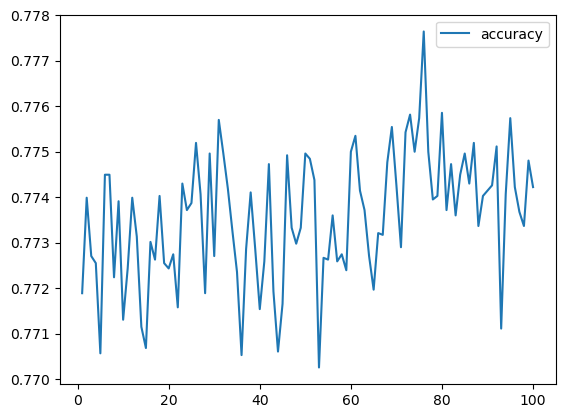

In [64]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [65]:
# Export our model to HDF5 file
nn.save('Models/AlphabetSoupCharity_Optimization.h5')